In [2]:
'''
Download the dataset.
Preprocess or clean the data.
Analyze the pre-processed data.
Train the machine with preprocessed data using an appropriate machine learning algorithm.
Save the model and its dependencies.
Build a Web application using a flask that integrates with the model built.
'''

'\nDownload the dataset.\nPreprocess or clean the data.\nAnalyze the pre-processed data.\nTrain the machine with preprocessed data using an appropriate machine learning algorithm.\nSave the model and its dependencies.\nBuild a Web application using a flask that integrates with the model built.\n'

In [1]:
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [4]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [9]:
#df = pd.read_csv('../input/mytest.csv')
df = pd.read_csv("C:\\Users\Blessy Rose\Downloads\dataset_website.csv")

print (df.shape)

#df.dtypes

(11055, 32)


In [10]:
# Load data
df.head(3)


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [12]:
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [13]:
df.duplicated().sum()

0

In [14]:
df['Google_Index'].value_counts()

 1    9516
-1    1539
Name: Google_Index, dtype: int64

In [15]:
df.mean()

index                          5528.000000
having_IPhaving_IP_Address        0.313795
URLURL_Length                    -0.633198
Shortining_Service                0.738761
having_At_Symbol                  0.700588
double_slash_redirecting          0.741474
Prefix_Suffix                    -0.734962
having_Sub_Domain                 0.063953
SSLfinal_State                    0.250927
Domain_registeration_length      -0.336771
Favicon                           0.628584
port                              0.728268
HTTPS_token                       0.675079
Request_URL                       0.186793
URL_of_Anchor                    -0.076526
Links_in_tags                    -0.118137
SFH                              -0.595749
Submitting_to_email               0.635640
Abnormal_URL                      0.705292
Redirect                          0.115694
on_mouseover                      0.762099
RightClick                        0.913885
popUpWidnow                       0.613388
Iframe     

In [16]:
# filling na values with mean
data = df.fillna(df.mean())

data.head(3)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1


In [17]:
data.isnull().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

C:\Users\Blessy Rose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

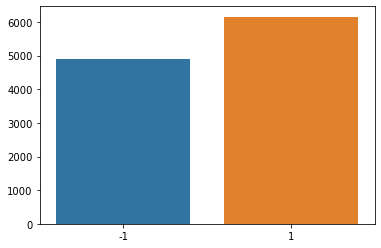

In [18]:
y = df["Result"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [19]:
y_True = df["Result"][df["Result"] == 1]
print ("Result Percentage = "+str( (y_True.shape[0] / df["Result"].shape[0]) * 100 ))

Result Percentage = 55.69425599276345


In [20]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='having_IPhaving_IP_Address'>

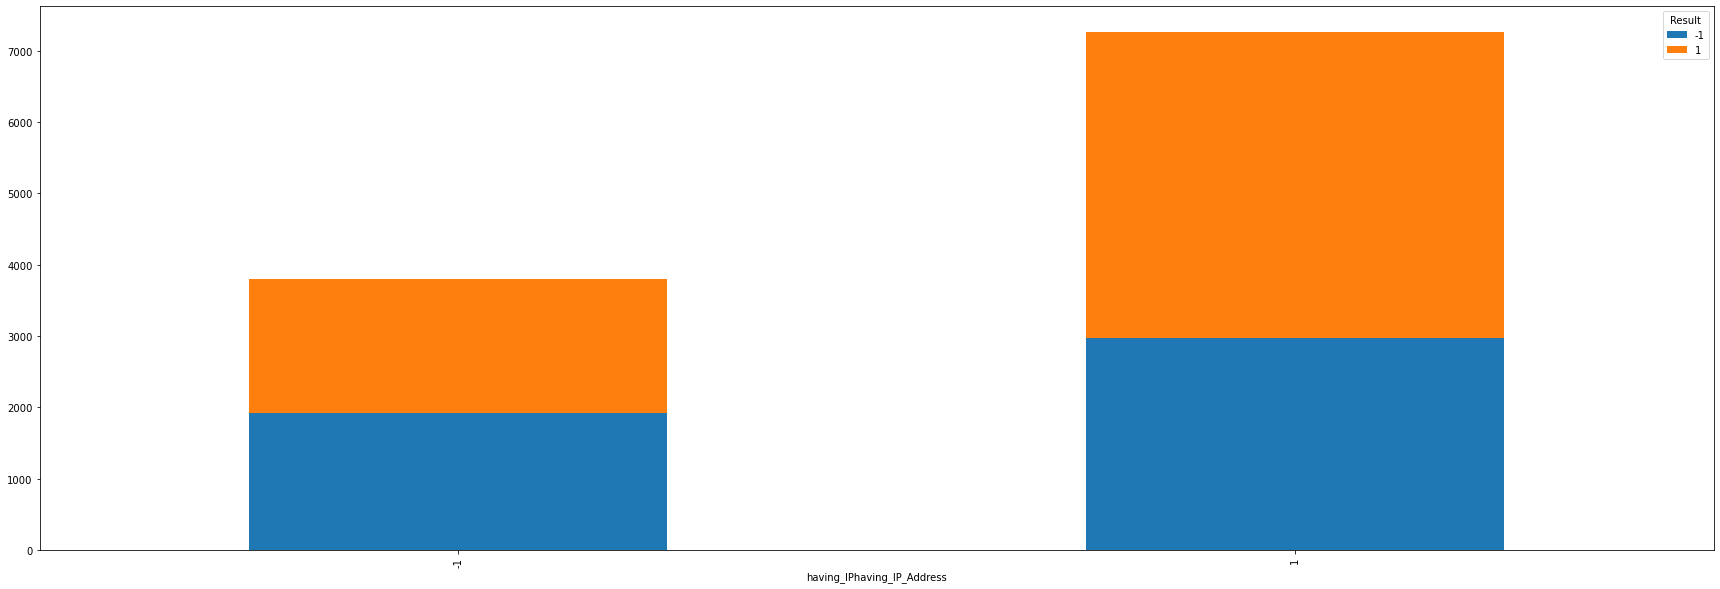

In [21]:
df.groupby(["having_IPhaving_IP_Address", "Result"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

<AxesSubplot:xlabel='URLURL_Length'>

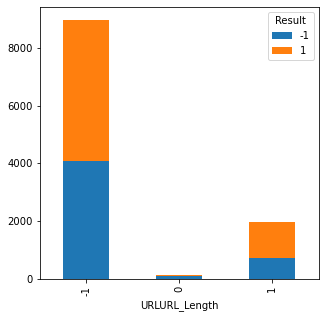

In [22]:
df.groupby(["URLURL_Length", "Result"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [23]:
y = df['Result'].to_numpy().astype(np.int)
y.size

C:\Users\BLESSY~1\AppData\Local\Temp/ipykernel_15084/1054516655.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = df['Result'].to_numpy().astype(np.int)


11055

In [47]:
#df.drop(["Result"], axis = 1, inplace=True)

In [28]:
X = df.to_numpy().astype(np.float)

C:\Users\BLESSY~1\AppData\Local\Temp/ipykernel_15084/662907609.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = df.to_numpy().astype(np.float)


In [29]:
X

array([[ 1.0000e+00, -1.0000e+00,  1.0000e+00, ...,  1.0000e+00,
         1.0000e+00, -1.0000e+00],
       [ 2.0000e+00,  1.0000e+00,  1.0000e+00, ...,  1.0000e+00,
         1.0000e+00,  1.0000e+00],
       [ 3.0000e+00,  1.0000e+00,  0.0000e+00, ...,  1.0000e+00,
         0.0000e+00, -1.0000e+00],
       ...,
       [ 1.1053e+04,  1.0000e+00, -1.0000e+00, ...,  1.0000e+00,
         0.0000e+00,  1.0000e+00],
       [ 1.1054e+04, -1.0000e+00, -1.0000e+00, ...,  1.0000e+00,
         1.0000e+00,  1.0000e+00],
       [ 1.1055e+04, -1.0000e+00, -1.0000e+00, ..., -1.0000e+00,
         1.0000e+00, -1.0000e+00]])

In [30]:
X.shape


(11055, 31)

In [31]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [32]:
X

array([[-1.73189414, -1.3836833 ,  2.13194274, ...,  0.40215372,
         1.15102939, -2.47633965],
       [-1.73158079,  0.72270873,  2.13194274, ...,  0.40215372,
         1.15102939,  0.40382183],
       [-1.73126744,  0.72270873,  0.82656323, ...,  0.40215372,
        -0.60360794, -2.47633965],
       ...,
       [ 1.73126744,  0.72270873, -0.47881627, ...,  0.40215372,
        -0.60360794,  0.40382183],
       [ 1.73158079, -1.3836833 , -0.47881627, ...,  0.40215372,
         1.15102939,  0.40382183],
       [ 1.73189414, -1.3836833 , -0.47881627, ..., -2.48661132,
         1.15102939, -2.47633965]])

In [33]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold: 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [35]:
xtrain,ytrain,xtest,ytest=train_test_split(X,y,test_size=0.25,random_state=123)

rf=ensemble.RandomForestClassifier(max_depth=8,n_estimators=5)
rf_cv_score=cross_val_score(estimator=rf,X=xtrain,y=xtest,cv=5)
print(rf_cv_score)

[0.93128391 0.94390832 0.93425814 0.93486128 0.94571773]


In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain, xtest)
LR_score=cross_val_score(estimator=lr,X=xtrain,y=xtest,cv=5)
print(LR_score)

[0.92405063 0.94571773 0.92340169 0.92641737 0.91556092]


In [37]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR_score=cross_val_score(estimator=LR,X=xtrain,y=xtest,cv=5)
print(LR_score)

[0.6928846  0.72232658 0.69234661 0.70275675 0.69840493]


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knc =  KNeighborsClassifier()
knc.fit(xtrain, xtest)
knn_score=cross_val_score(estimator=knc,X=xtrain,y=xtest,cv=5)
print(knn_score)

[0.92947559 0.9535585  0.94209891 0.94571773 0.93667069]


In [39]:
from sklearn.svm import LinearSVC
SVC=  LinearSVC()
svc_score=cross_val_score(estimator=SVC,X=xtrain,y=xtest,cv=5)
print(svc_score)

C:\Users\Blessy Rose\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Blessy Rose\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Blessy Rose\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Blessy Rose\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.92163954 0.9451146  0.92098914 0.92641737 0.91978287]


C:\Users\Blessy Rose\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [40]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(max_depth=6, random_state=0)
dt_cv_score=cross_val_score(estimator=decTree,X=xtrain,y=xtest,cv=5)
print(dt_cv_score)

[0.92646172 0.94089264 0.93244873 0.93244873 0.93606755]


In [41]:
print("DT", dt_cv_score)
print("RF", rf_cv_score)
print("SCM", svc_score)
print("kNN ", knn_score)
print("LR", LR_score)

DT [0.92646172 0.94089264 0.93244873 0.93244873 0.93606755]
RF [0.93128391 0.94390832 0.93425814 0.93486128 0.94571773]
SCM [0.92163954 0.9451146  0.92098914 0.92641737 0.91978287]
kNN  [0.92947559 0.9535585  0.94209891 0.94571773 0.93667069]
LR [0.6928846  0.72232658 0.69234661 0.70275675 0.69840493]


In [42]:
import pickle
with open('model_pkl_knc', 'wb') as files:
    pickle.dump(knc, files)

In [43]:
with open('model_pkl_knc' , 'rb') as f:
    lr = pickle.load(f)

In [44]:
X1 = df.to_numpy().astype(np.float)
t = X1[10]
lr.predict([t]) 

C:\Users\BLESSY~1\AppData\Local\Temp/ipykernel_15084/2873813233.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = df.to_numpy().astype(np.float)


array([1])